In [13]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "whitegrid")

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML, Javascript
import IPython.display

import os
print(os.getcwd())



/Users/keshav/Desktop/Adobe/movie_recommendation


### 1. Background
<b> <p>
            An online movie rental platform, seeks assistance in increasing their net profit. The platform allows authenticated users to watch, rent-to-watch or buy movies, each with specific storage and viewing constraints .  The client envisions two strategies to enhance profit: building a movie recommendation engine to increase the number of rented movies and a community recommendation engine because they believe communities can influence users to rent more movies.
 </p></b>

<b>     
Business Context
<ol> • Movie Rental Fee: $5 </ol> 

<ol> • Movie Purchase Fee: $12 </ol>
    
<ol> • Monthly Membership: $20 </ol>

<ol> • Cost of Storing Uncompressed Movie: $0.75/day </ol>

<ol> • Cost of Movie Recommendation: $0.01/recommended movie </ol>

<ol> • Constraints on movie renting and purchasing: Every rented movie has a rental expiration period of 72 hours. </ol>

<ol> • When a rented movie is started, i must be completed in the next 24 hours.These contraints are associated with the client’s expenses to store rented movies in a de-compressed for- mat. </ol>

<ol> • When a purchased movie is not watched in the last 15 days, it gets compressed in order to reduce storage costs.</ol>
</b>

### 2. Problem Statement:

• Business Evaluation Report: – Validate the profitability of the recommendation engine.

• Additional Recommendations: – Suggest alternative approaches to increase profit.

In [15]:
# Sample Size and assumptions:
no_of_day = 90 
no_of_user = 100
no_movies_recommention = 5

In [2]:
# Constants
rental_fee = 5
rental_watch_max = 72
rental_watch_min = 24

storage_cost_per_day = 0.75

purchase_fee = 12
purchase_watch= 15

monthly_membership= 20
recommendation_cost_movie = 0.01

In [3]:
def net_profit_rental(rental_fee, storage_cost, time_watch_max,time_watch_min):
    min_net_rental_profit = rental_fee - (storage_cost * ((rental_watch_max)/24))
    max_net_rental_profit = rental_fee - (storage_cost * ((rental_watch_min)/24))
    avg_retal_profit = (min_net_rental_profit+max_net_rental_profit)/2
    return (f"Minimum net profit from each rental {min_net_rental_profit}", f"Maximum net profit from each rental {max_net_rental_profit}",
           avg_retal_profit,min_net_rental_profit )

print(net_profit_rental(rental_fee,storage_cost_per_day,rental_watch_max,rental_watch_min))
print('\n', f"Net average profit per rental per user: ${(net_profit_rental(rental_fee,storage_cost_per_day,rental_watch_max,rental_watch_min))[2]}",
     '\n', f"Net average profit per rental per user evert quater: ${(net_profit_rental(rental_fee,storage_cost_per_day,rental_watch_max,rental_watch_min))[2]*90}",
     )

('Minimum net profit from each rental 2.75', 'Maximum net profit from each rental 4.25', 3.5, 2.75)

 Net average profit per rental per user: $3.5 
 Net average profit per rental per user evert quater: $315.0


In [4]:
def net_profit_purchase(purchase_fee, storage_cost, purchase_watch):
    
    net_purchase_profit = purchase_fee - (storage_cost_per_day * purchase_watch)
    
    return (net_purchase_profit, f"Net Purchase profit for first 15 days {net_purchase_profit}")

net_profit_purchase (purchase_fee,storage_cost_per_day, purchase_watch)

(0.75, 'Net Purchase profit for first 15 days 0.75')

In [5]:
net_profit_rental(rental_fee,storage_cost_per_day,rental_watch_max,rental_watch_min)[-1]

2.75

In [10]:
def net_profit_rental_before_after (no_movies_recommention, net_profit_rental):
    recommendation_cost_3day_rent = round(no_movies_recommention * 0.01 *3,3)
    profit_rental_3days = net_profit_rental
    net_profit_rental_3days = profit_rental_3days - recommendation_cost_3day_rent
    
    net_profit_rental_month = profit_rental_3days*10 
    net_profit_rental_month_with_conversion = net_profit_rental_month + rental_fee*.30
    
    return(net_profit_rental_month, net_profit_rental_month_with_conversion)

print(list(net_profit_rental_before_after(no_movies_recommention,net_profit_rental(rental_fee,storage_cost_per_day,rental_watch_max,rental_watch_min)[-1]))
)

def net_profit_purchase_before_after (no_movies_recommention, profit_15days_buy):
    recommendation_cost_15day_buy = round(no_movies_recommention * 0.01 *15,3)
    
    net_profit_rental_15days_buy = profit_15days_buy - recommendation_cost_15day_buy
    net_profit_rental_month_with_conversion = net_profit_rental_15days_buy + purchase_fee*.20
    
    return(profit_15days_buy, net_profit_rental_month_with_conversion)

print(list(net_profit_purchase_before_after(no_movies_recommention,net_profit_purchase (purchase_fee,storage_cost_per_day, purchase_watch)[0])))


[27.5, 29.0]
[0.75, 2.4000000000000004]


In [11]:
net_profit_purchase (purchase_fee,storage_cost_per_day, purchase_watch)[0]

0.75

[27.5, 29.0]
[0.75, 2.4000000000000004]


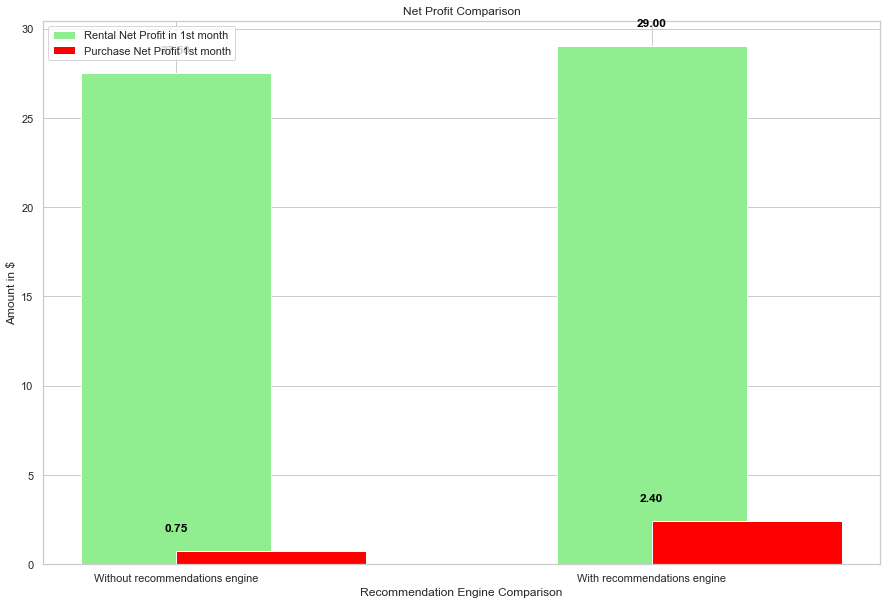

In [14]:
print(list(net_profit_rental_before_after(no_movies_recommention,net_profit_rental(rental_fee,storage_cost_per_day,rental_watch_max,rental_watch_min)[-1])))
print(list(net_profit_purchase_before_after(no_movies_recommention,net_profit_purchase (purchase_fee,storage_cost_per_day, purchase_watch)[0])))


def visualize_bars(data1, data2, labels):
    x = range(len(labels))
    plt.figure(figsize=(15,10))
    plt.bar(x, data1, width=0.4, label='Rental Net Profit in 1st month', align='center', color='lightgreen')
    plt.bar(x, data2, width=0.4, label='Purchase Net Profit 1st month', align='edge', color='red')
    
    for i, (value1, value2) in enumerate(zip(data1, data2)):
        plt.text(i, value1 + 1, f'{value1:.2f}', ha='center', va='bottom', color='black', fontweight='bold')
        plt.text(i, value2 + 1, f'{value2:.2f}', ha='center', va='bottom', color='black', fontweight='bold')


    plt.xlabel('Recommendation Engine Comparison')
    plt.ylabel('Amount in $')
    plt.title('Net Profit Comparison')
    plt.xticks(x, labels)
    plt.legend()
    
    plt.show()

data1 = [27.5, 29.0]
data2 = [0.75, 2.4000000000000004]
labels = ['Without recommendations engine', 'With recommendations engine']

visualize_bars(data1, data2, labels)

### Summary: 
 1. Assumption: Generating 5 recommendation per user every day 
 2. Assumption: customers are 30% more likely to rent  and 20% likely to buy every month after the receiving recommendations every day. 


### Conclusion:

In conclusion, our analysis highlights a significant impact of the recommendation engine on the overall profitability of the company.

#### Detailed Findings:

Our model indicates a substantial increase in profitability attributable to the implementation of a recommendation engine. Specifically, when considering purchase services, the company is generating 0.75 dollars in net profits per user within the initial 15 days. In contrast, the rental services exhibits a notable increase, resulting in a monthly per-user net profit of 27.4 dollars.

On comparison with help of recommendation engine for the first month the net profit for purchase service increased to 2.4 dollars from .75 dollars and for rental services increased from 27.5 to 29.0. 

#### Strategic Recommendation:

Hence, given these findings, we recommend that the company strategically focuses on rental and subscription-based services approach to increase in profit, leveraging the power of personalized recommendation systems. This emphasis is likely to yield a considerable boost in profits through the recommendation engine.

The personalized nature of recommendations not only enhances user engagement but also contributes significantly to the company's bottom line. As users increasingly rely on the platform for curated content suggestions, the company stands to benefit from heightened user satisfaction, retention, and ultimately, increased profitability.
